# Recurrent Neural Networks

* CNNs were more effective for use with 2D image data.

* In the same way, RNNs are more effective for sequence data, such as time-stamped             data, sentences, audio, etc.

* Goal is to learn off of historical info, and make forecasts.

* Also used in predictive texts.

## Working

* Consider example of predictive text.

* To be able to predict the next word, the neuron must know of the words that have been       typed previously, i.e. it must be made aware of the previous history of outputs.

* Simple way to do this is to feed the output of the neuron at T-1 seconds to the same         neuron at T seconds, along with any new input at T.

* Cells that are a function of inputs from previous time steps are also known as **memory       cells**.

* RNNs can take both sequences and single-vector values.

## Architectures for RNNs

* Sequence to Sequence (many to many)
    * Example: Given 5 previous words, predict the next 5.
    
* Sequence to Vector (many to one)
    * Given 5 previous words, predict the next word.

* Vector to Sequence (one to many)
    * Given one word, predict the next N words.


## Disadvantages

* A basic RNN can only remember the previous output, but it is desirable that it could keep   track of a larger history.

# Vanishing & Exploding Gradients

* Gradients are used to adjust weights and biases in our network.

* Backpropagation goes backward from output to input layer, propagating the error gradient.

* For deeper networks, this leads to problems such as vanishing and exploding gradients.

## Vanishing Gradient

* As we go back to the lower layers, gradients get very small and as a result, weights do     not get changed at lower levels (close to the input layer).

* When **n** hidden layers use an activation like the sigmoid function, **n** small           derivates are multiplied together.

* The gradient could decrease exponentially as we propogate down to the initial layers.

### Solution

* Use ReLU or leaky-ReLU or tan-hyperbolic functions.

* Perform batch normalization, where models normalizes each batch using the batch mean and     standard deviation.

## Exploding Gradient

* The opposite can also occur, gradients explode on the way back to input layer, causing issues.

### Solution

* Use gradient clipping to cut off gradients to be in between -1 and +1 only.

**THESE ISSUES ARE FACED BY ANNs, RNNS POSE THEIR OWN GRADIENT CHALLENGES. WE FIX THOSE BY USING LSTM.**

# Long-Short Term Memory Cells

* The solutions presented before can be applied to RNNs, but they slow down training time.

* A neuron will start to forget the first inputs as information is lost at each step going     through the RNN.

* This problem is fixed by LSTM.

## Working

* Equation used to describe a basic RNN:  

  $$Output(T) = Input(T) + Output(T-1)$$
  
* Equation to describe LSTM:  

  $$New LTM, New STM, Output(T) = LTM + STM + Input(T)$$
  
## Components of an LSTM

* Forget Gate
    * Decides what to forget from previous memory units
    
* Input Gate
    * Decides what to accept into neuron.

* Output Gate
    * Outputs the new memory.

* Update Gate
    * Updates the memory.
    

# Gated Recurrent Unit

* A tweaked version of LSTM that combines forget and input gate into a single update gate.


# Basic RNN on Sine Wave

* Begin by splitting data into test and train set.

* The splitting should be done while maintaing the pattern of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
x = np.linspace(0, 50, 501) # 501 equally spaced values betwwen 0 and 50

In [3]:
y = np.sin(x)

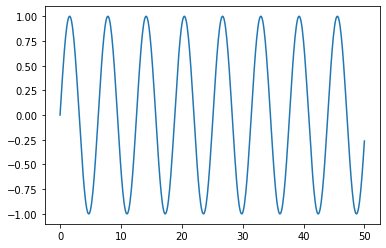

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=["sin(x)"])
df

,sin(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Test-Train Split

In [6]:
cutoff_percent = 0.1

n_test_rows = np.round(len(df) * cutoff_percent)
n_test_rows

50.0

In [7]:
cutoff_index = int(len(df) - n_test_rows)
cutoff_index

451

In [8]:
train = df.iloc[ : cutoff_index]
train.head()

,sin(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [9]:
test = df.iloc [cutoff_index : ]
test.head()

,sin(x)
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


# Scaling Data

* Here, we will be scaling both, features, and the labels.

* This is done because we will be feeding the output at T-1 back into the neurons as input     at T.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [11]:
scaled_train = scaler.fit_transform(train)

scaled_test = scaler.transform(test)

# Creating Batches for Training

* Objective is to provide a sequence of input, and get the output based on it.

$$input(0, 2, 4, 6, 8) --> output(10)$$

* Here, length refers to length of input sequence, which is 5.

* The length value is critical, it should be high enough so the pattern is captured, but       also less to avoid humongous training times.

* The batch size is the length of output sequence, which is just 1.


In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

<AxesSubplot:>

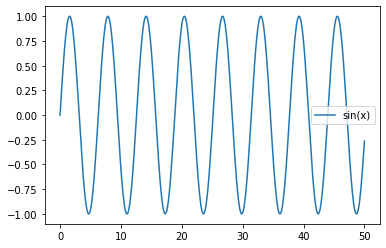

In [13]:
df.plot()

# There are 500 points between 0 and 50, and we can see that the pattern will be covered 
# if we select a value between 50 and 100.

In [14]:
length = 50
batch_size = 1 # Standard batch size

In [15]:
# Timeseries...(where X is present, where Y is present)
# In our case, X, y are both present together in training data itself

generator = TimeseriesGenerator(
                scaled_train, 
                scaled_train,
                length=length,
                batch_size=batch_size,
            )

In [16]:
X, y = generator[0]

In [17]:
X[0][48:] # Just look at the 48th and 49th value of the input sequence

array([[0.00191281],
       [0.00876887]])

In [18]:
y # The 50th value is what's in output sequence

array([[0.02053313]])

In [19]:
scaled_train[48: 51] # input([0], [1], ... [48], [49]) -> Output ([50])

array([[0.00191281],
       [0.00876887],
       [0.02053313]])

# Creating the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [21]:
n_features = 1 # How many features are we training off of?

In [22]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile('adam', 'mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit_generator(generator, epochs=5)

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
401/401 [==============================] - 4s 7ms/step - loss: 0.0178
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 5.8925e-06
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 5.2009e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 3.8924e-05
Epoch 5/5
401/401 [==============================] - 4s 10ms/step - loss: 7.4029e-05


# Evaluating Model Performance

<AxesSubplot:>

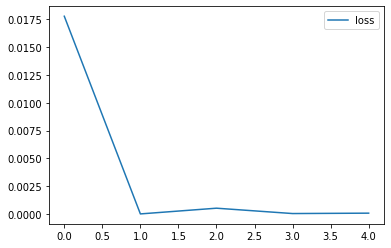

In [25]:
metrics = pd.DataFrame(model.history.history)

metrics.plot()

In [26]:
test_predictions = []

first_eval_batch = scaled_train[-length : ]
current_batch = first_eval_batch.reshape(1, length, n_features) 
# Transforming data to adhere to the shape

for i in range(len(scaled_test)):
    
    
              
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
              
              # Shift batch one step forward by adding current prediction to very end
    current_batch = np.append(
                        current_batch[: , 1: , :], # its 3 dimensional
                        [[current_prediction]], 
                        axis=1
                    )

In [27]:
test_predictions[:][0:4]

[array([0.97754], dtype=float32),
 array([0.9960149], dtype=float32),
 array([1.0085112], dtype=float32),
 array([1.0161244], dtype=float32)]

In [28]:
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions[:4]

array([[0.95507414],
       [0.99202359],
       [1.01701598],
       [1.03224222]])

In [29]:
test['predictions'] = true_predictions

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
test.head()

,sin(x),predictions
45.1,0.899097,0.955074
45.2,0.938307,0.992024
45.3,0.968142,1.017016
45.4,0.988304,1.032242
45.5,0.998591,1.064170


<AxesSubplot:>

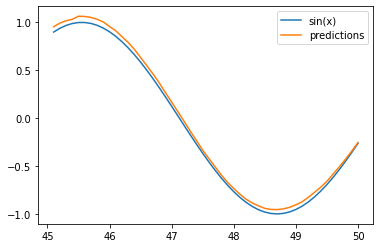

In [31]:
test.plot()

# Using LSTM Along with Callbacks

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
length = 49 # For validation data, there are only 50 entries (max index = 49), which is
# why we are reducing length by one to not run into error

generator = TimeseriesGenerator(
                scaled_train, 
                scaled_train,
                length=length,
                batch_size=batch_size,
            )

In [35]:
# Comparable to passing validation data in ANN and CNN

validation_generator = TimeseriesGenerator(
                            scaled_test, 
                            scaled_test, 
                            length=length,
                            batch_size=batch_size,
                        )

In [36]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile('adam', 'mse')

In [37]:
model.fit_generator(
    generator, 
    epochs=20, 
    validation_data=validation_generator,
    callbacks=[early_stop]
)

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 9s 16ms/step - loss: 0.0161 - val_loss: 1.0063e-04
Epoch 2/20
402/402 [==============================] - 8s 21ms/step - loss: 1.8105e-04 - val_loss: 2.3391e-04
Epoch 3/20
402/402 [==============================] - 7s 18ms/step - loss: 1.2308e-04 - val_loss: 3.8325e-04


In [39]:
test_predictions = []

first_eval_batch = scaled_train[-length : ]
current_batch = first_eval_batch.reshape(1, length, n_features) 
# Transforming data to adhere to the shape

for i in range(len(scaled_test)):
    
    
              
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
              
              # Shift batch one step forward by adding current prediction to very end
    current_batch = np.append(
                        current_batch[: , 1: , :], # its 3 dimensional
                        [[current_prediction]], 
                        axis=1
                    )

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)

test['LSTM predictions'] = true_predictions

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
test.head()

,sin(x),predictions,LSTM predictions
45.1,0.899097,0.955074,0.869833
45.2,0.938307,0.992024,0.902683
45.3,0.968142,1.017016,0.924659
45.4,0.988304,1.032242,0.935596
45.5,0.998591,1.064170,0.935708


<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

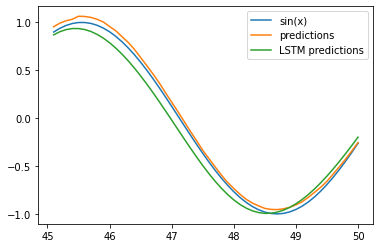

In [44]:
test.plot()

# Making Model Train on Entire Data and Make Predictions Into the Future

In [46]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [48]:
length = 50 

generator = TimeseriesGenerator(
                scaled_full_data, 
                scaled_full_data,
                length=length,
                batch_size=batch_size,
            )

In [49]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile('adam', 'mse')

In [50]:
model.fit_generator(
    generator, 
    epochs=5,
)

/usr/local/anaconda3/envs/neural-engine/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
451/451 [==============================] - 10s 19ms/step - loss: 0.0091
Epoch 2/5
451/451 [==============================] - 9s 20ms/step - loss: 2.7645e-05
Epoch 3/5
451/451 [==============================] - 7s 15ms/step - loss: 1.5277e-04
Epoch 4/5
451/451 [==============================] - 7s 15ms/step - loss: 1.3613e-04
Epoch 5/5
451/451 [==============================] - 8s 18ms/step - loss: 1.2942e-04


In [51]:
forecast = []

first_eval_batch = scaled_train[-length : ]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(25): # Decide the number of points you want to forecast into the future
    
    
              
    current_prediction = model.predict(current_batch)[0]
    forecast.append(current_prediction)
              
    current_batch = np.append(
                        current_batch[: , 1: , :],
                        [[current_prediction]], 
                        axis=1
                    )

,sin(x)
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [53]:
forecast = scaler.inverse_transform(forecast)

In [55]:
# Creating indices for forecasted data
# DF ends at 50, had step size of 0.1
# Thus, next entry should start from 50.1, and to account for 25 points, it should go up
# till [50.1 + (25 * 0.1)] i.e 52.6

forecast_index = np.arange(50.1, 52.6, step=0.1)
forecast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5])

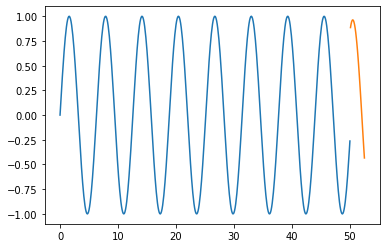

In [57]:
plt.plot(df.index, df["sin(x)"])
plt.plot(forecast_index, forecast)

# To make it continuous, bind the forecast into the existing DF first